<a href="https://colab.research.google.com/github/pcamarillor/semantic_mapping/blob/main/AprendizajeAutomatico_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Example

Este ejemplo contiene la información de los salarios de multiples empelados.

Fuente: https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression



In [91]:
from pandas.core.internals.managers import maybe_convert_indices
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Salary_Data.csv')
display(df.head(10))

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Exploramos el dataset para verificar que los valores puedan ser tratados como valores numéricos.

In [92]:
df['YearsExperience'] = pd.to_numeric(df['YearsExperience'])
df['Salary'] = pd.to_numeric(df['Salary'])

print('Validation done')

Validation done


Una vez validados, procedemos a calcular el modelo de regresión lineal.

In [101]:
def compute_model(X, Y):
  N = X.size
  XiYi = X.mul(Y).sum()
  _x = X.sum()
  _y = Y.sum()
  _x_2 = X.pow(2).sum()

  m = (N * XiYi - _x * _y) / (N * _x_2 - _x**2)
  b = (_y - m *_x) / N
  print("f(x) -> {0}x + {1}".format(m, b))

  return m, b

m, b = compute_model(df['YearsExperience'], df['Salary'])

def f(_m, _b, x):
  return _m*x + _b




f(x) -> 9449.962321455077x + 25792.200198668685


Una vez calculado el modelo, procedemos a graficas los valores reales y la linea roja representa el modelo inferido.

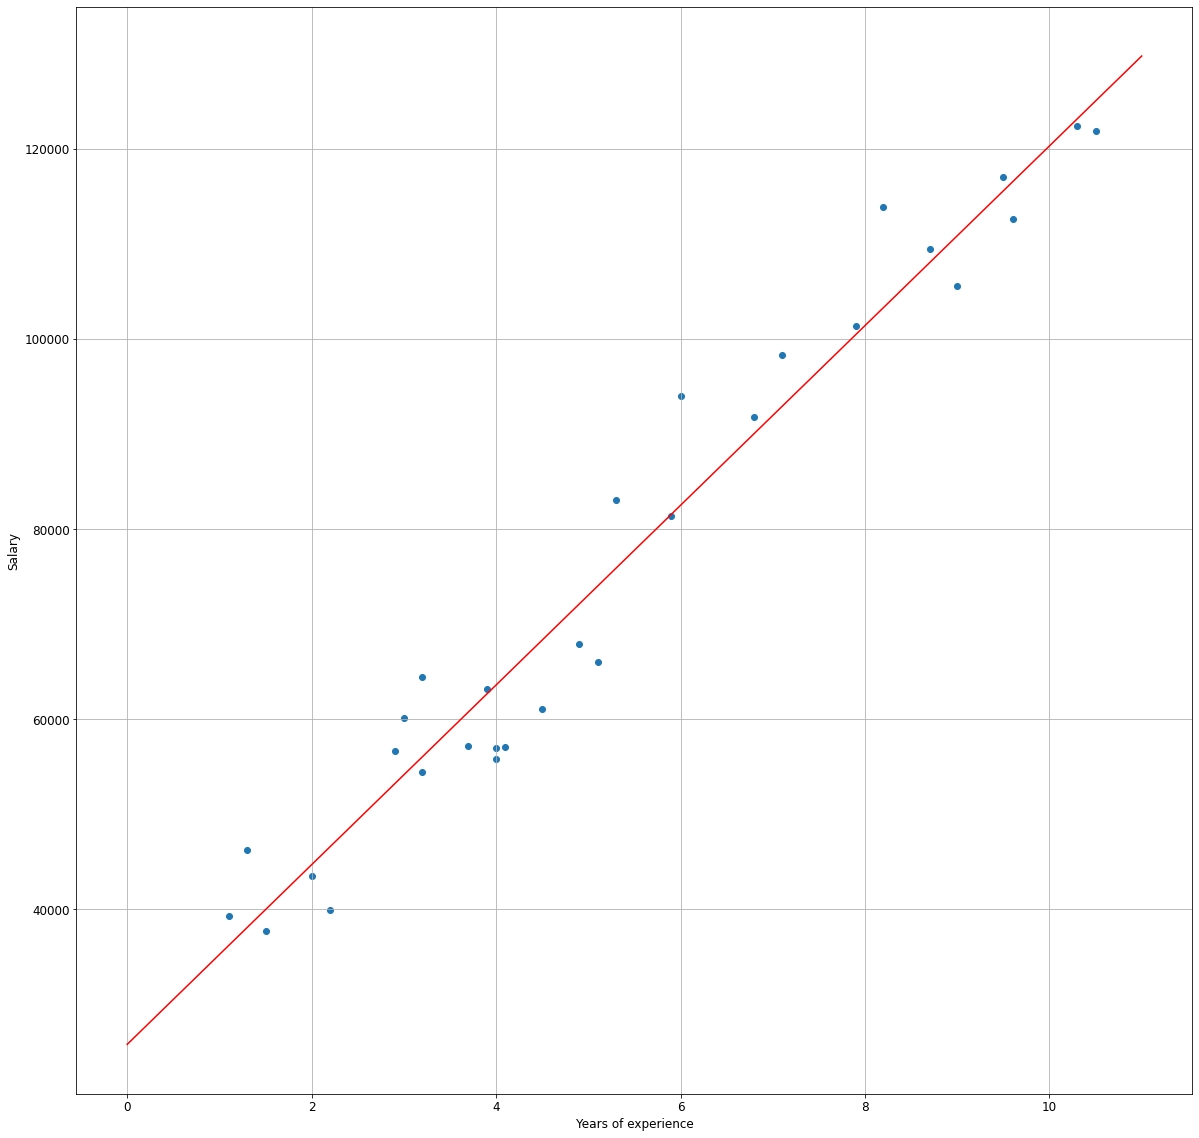

In [102]:
from matplotlib import pyplot as plt

# Plot current data
plt.grid()
plt.scatter(df['YearsExperience'], df['Salary'], marker="o")

# Plot model
xi = [i for i in range(0, 12)]
yi = [f(m, b, itemx) for itemx in xi]
plt.plot(xi, yi, '-r', label='y = mx + b')
plt.ylabel("Salary")
plt.xlabel("Years of experience")

plt.show()